# Zoomcamp MLOps Course Cohort 2024 Week 04 Homework
*Version:* `1.2` *(Jupytext, time measurements, logger, param notebook execution, fixes)*

<a name="ToC"></a>
# Table of Content

- [Notebook Description](#0)
- [General Settings](#1)
    - [Paths](#1-1)
    - [Notebook Functionality and Appearance](#1-2)
    - [External Libraries](#1-3)
    - [Internal Code](#1-4)
    - [Constants](#1-5)   
- [Analysis](#2)   
    - [Questions](#2-2)
        - [Q1 Notebook](#2-2-1)     
        - [Q2 Preparing the output](#2-2-2)
        - [Q3 Creating the scoring script](#2-2-3)
        - [Q4 Virtual environment](#2-2-4)
        - [Q5 Parametrize the script](#2-2-5)
        - [Q6 Docker container](#2-2-6)      
- [Final Timestamp](#3)  

<a name="0"></a>
# Notebook Description
[ToC](#ToC) 

> *Please put your comments about the notebook functionality here.*  

<a name="1"></a>
# GENERAL SETTINGS
[ToC](#ToC)  
General settings for the notebook (paths, python libraries, own code, notebook constants). 

> *NOTE: All imports and constants for the notebook settings shoud be here. Nothing should be imported in the analysis section.*

<a name="1-1"></a>
### Paths
[ToC](#ToC)  

Adding paths that are necessary to import code from within the repository.

In [1]:
import sys
import os
sys.path+=[os.path.join(os.getcwd(), ".."), os.path.join(os.getcwd(), "../..")] # one and two up

<a name="1-2"></a>
### Notebook Functionality and Appearance
[ToC](#ToC)  
Necessary libraries for notebook functionality:
- A button for hiding/showing the code. By default it is deactivated and can be activated by setting CREATE_BUTTON constant to True. 
> **NOTE: This way, using the function, the button works only in active notebook. If the functionality needs to be preserved in html export, then the code has to be incluced directly into notebook.**
- Set notebook width to 100%.
- Notebook data frame setting for better visibility.
- Initial timestamp setting and logging the start of the execution.

#### Overall Setting Specification

In [2]:
LOGGER_CONFIG_NAME = "logger_file_limit_console"
ADDAPT_WIDTH = False

#### Overall Behaviour Setting

In [3]:
try:
    from src.utils.notebook_support_functions import create_button, get_notebook_name
    NOTEBOOK_NAME = get_notebook_name()
    SUPPORT_FUNCTIONS_READ = True
except:
    NOTEBOOK_NAME = "NO_NAME"
    SUPPORT_FUNCTIONS_READ = False  

In [4]:
from src.utils.logger import Logger
from src.utils.envs import Envs
from src.utils.config import Config
from pandas import options
from IPython.display import display, HTML

In [5]:
options.display.max_rows = 500
options.display.max_columns = 500
envs = Envs()
envs.set_logger(LOGGER_CONFIG_NAME)
Logger().start_timer(f"NOTEBOOK; Notebook name: {NOTEBOOK_NAME}")
if ADDAPT_WIDTH:
    display(HTML("<style>.container { width:100% !important; }</style>")) # notebook width

2024-06-17 09:43:18,281 - file_limit_console - INFO - Logger was created on WS-3000 in branche 004_do_week_04_hw.
2024-06-17 09:43:18,283 - file_limit_console - INFO - Process: NOTEBOOK; Notebook name: W04_HW.ipynb; Timer started;


In [6]:
# create_button()

<a name="1-3"></a>
### External Libraries
[ToC](#ToC)  

In [7]:
from datetime import datetime

import pickle
import pandas as pd
from numpy import std
from os.path import join
from sklearn.metrics import mean_squared_error

from IPython.display import display, HTML, Image

<a name="1-4"></a>
### Internal Code
[ToC](#ToC)  
Code, libraries, classes, functions from within the repository.

In [8]:
from src.utils.date_time_functions import create_datetime_id

<a name="1-5"></a>
### Constants
[ToC](#ToC)  
Constants for the notebook.

> *NOTE: Please use all letters upper.*

#### General Constants
[ToC](#ToC)  

In [9]:
# from src.global_constants import *  # Remember to import only the constants in use
N_ROWS_TO_DISPLAY = 2
FIGURE_SIZE_SETTING = {"autosize": False, "width": 2200, "height": 750}
DATA_PROCESSING_CONFIG_NAME = "data_processing_basic"

#### Constants for Setting Automatic Run
[ToC](#ToC)  

In [10]:
# MANDATORY FOR CONFIG DEFINITION AND NOTEBOOK AND ITS OUTPUTS IDENTIFICATION #########################################
PYTHON_CONFIG_NAME = "python_local"
ID = create_datetime_id(now=datetime.now(), add_micro=False)
# (END) MANDATORY FOR CONFIG DEFINITION AND NOTEBOOK AND ITS OUTPUTS IDENTIFICATION ###################################

#### Python Config Initialisation
[ToC](#ToC)  

In [11]:
envs.set_config(PYTHON_CONFIG_NAME)

#### Notebook Specific Constants
[ToC](#ToC)  

<a name="2"></a>
# ANALYSIS
[ToC](#ToC)  

<a name="2-2"></a>
## Questions
[ToC](#ToC)   

<a name="2-2-1"></a>
### Q1 Notebook
[ToC](#ToC)  

We'll start with the same notebook we ended up with in homework 1. We cleaned it a little bit and kept only the scoring part. You can find the initial notebook here.

Run this notebook for the March 2023 data.

What's the standard deviation of the predicted duration for this dataset?

1.24  
6.24  
12.28  
18.28  

In [12]:
with open(join(Config().get_data().path.models, "model.bin"), "rb") as f_in:
    dv, model = pickle.load(f_in)

D:\zoo-hw\.venv\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DictVectorizer from version 1.5.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\zoo-hw\.venv\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.5.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [13]:
categorical = ["PULocationID", "DOLocationID"]

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df["duration"] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [14]:
df = read_data("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet")

In [15]:
dicts = df[categorical].to_dict(orient='records')
X_val = dv.transform(dicts)
y_val = df["duration"].to_numpy()
y_pred = model.predict(X_val)

In [16]:
std_val = round(std(y_pred), 4)
std_val

6.2475

In [17]:
answer = f"The standard deviation of predicted data is: {std_val}"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-2"></a>
### Q2 Preparing the output
[ToC](#ToC)  

Like in the course videos, we want to prepare the dataframe with the output.

First, let's create an artificial ride_id column:

~~~
df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')
~~~

Next, write the ride id and the predictions to a dataframe with results.

Save it as parquet:

~~~
df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)
~~~

What's the size of the output file?

36M  
46M  
56M  
66M  
Note: Make sure you use the snippet above for saving the file. It should contain only these two columns. For this question, don't change the dtypes of the columns and use pyarrow, not fastparquet.

In [18]:
year = 2023
month = 3
output_file = join(Config().get_data().path.processed_data, "df_result")
output_file

'E:/DATA/processed\\df_result'

In [19]:
df["ride_id"] = f"{year:04d}/{month:02d}_" + df.index.astype("str")

df_result = df[["ride_id"]].copy()
df_result["prediction"] = y_pred
df_result.to_parquet(
    path=output_file,
    engine='pyarrow',
    compression=None,
    index=False
)

In [20]:
df_result.head()

,ride_id,prediction
0,2023/03_0,16.245906
1,2023/03_1,26.134796
2,2023/03_2,11.884264
3,2023/03_3,11.997720
4,2023/03_4,10.234486


In [21]:
answer = "The size of the file on the disk is: 67 M."
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-3"></a>
### Q3 Creating the scoring script
[ToC](#ToC)  

Now let's turn the notebook into a script.

Which command you need to execute for that?

In [22]:
answer = "The command for turning notebook into plane script is: jupyter nbconvert --to script W04_HW.ipynb"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-4"></a>
### Q4 Virtual environment
[ToC](#ToC)  

Now let's put everything into a virtual environment. We'll use pipenv for that.

Install all the required libraries. Pay attention to the Scikit-Learn version: it should be the same as in the starter notebook.

After installing the libraries, pipenv creates two files: Pipfile and Pipfile.lock. The Pipfile.lock file keeps the hashes of the dependencies we use for the virtual env.

What's the first hash for the Scikit-Learn dependency?

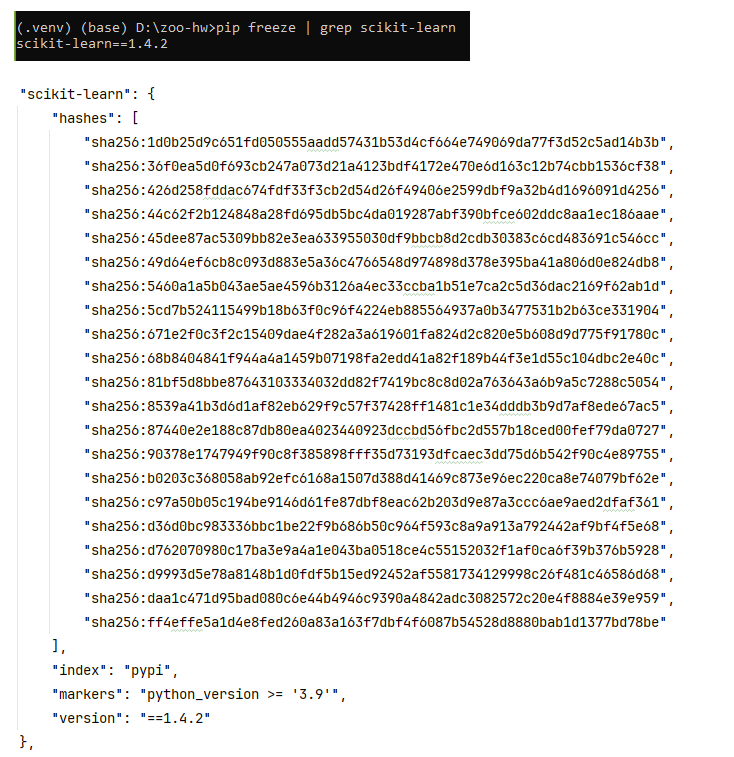

In [24]:
display(Image(filename="W4_Q04.png"))

In [25]:
answer = "The first hash is: sha256:1d0b25d9c651fd050555aadd57431b53d4cf664e749069da77f3d52c5ad14b3b"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-5"></a>
### Q5 Parametrize the script
[ToC](#ToC)

Let's now make the script configurable via CLI. We'll create two parameters: year and month.

Run the script for April 2023.

What's the mean predicted duration?

7.29  
14.29  
21.29  
28.29  
Hint: just add a print statement to your script.

<a name="2-2-6"></a>
### Q6 Docker container
[ToC](#ToC) 

Finally, we'll package the script in the docker container. For that, you'll need to use a base image that we prepared.

This is what the content of this image is:

~~~
FROM python:3.10.13-slim

WORKDIR /app
COPY [ "model2.bin", "model.bin" ]
Note: you don't need to run it. We have already done it.
~~~

It is pushed it to agrigorev/zoomcamp-model:mlops-2024-3.10.13-slim, which you need to use as your base image.

That is, your Dockerfile should start with:

~~~
FROM agrigorev/zoomcamp-model:mlops-2024-3.10.13-slim

# do stuff here
~~~

This image already has a pickle file with a dictionary vectorizer and a model. You will need to use them.

Important: don't copy the model to the docker image. You will need to use the pickle file already in the image.

Now run the script with docker. What's the mean predicted duration for May 2023?

0.19  
7.24  
14.24  
21.19  

<a name="3"></a>
# Final Timestamp
[ToC](#ToC)  

In [ ]:
Logger().end_timer()